<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_15/Assignment%2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 15 - Itiel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

In [2]:
# Load the dataset
df = pd.read_csv('bank-loan.csv')
# Display the 1st few rows
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
# Shape of the dataset
df.shape
# display basic information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [4]:
# Summary statistics
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


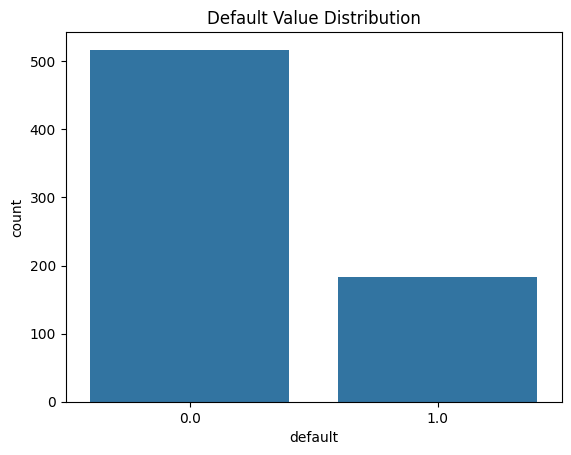

In [5]:
# Visualize the distribution of the target variable
sns.countplot(x='default', data=df)
plt.title("Default Value Distribution")
plt.show()

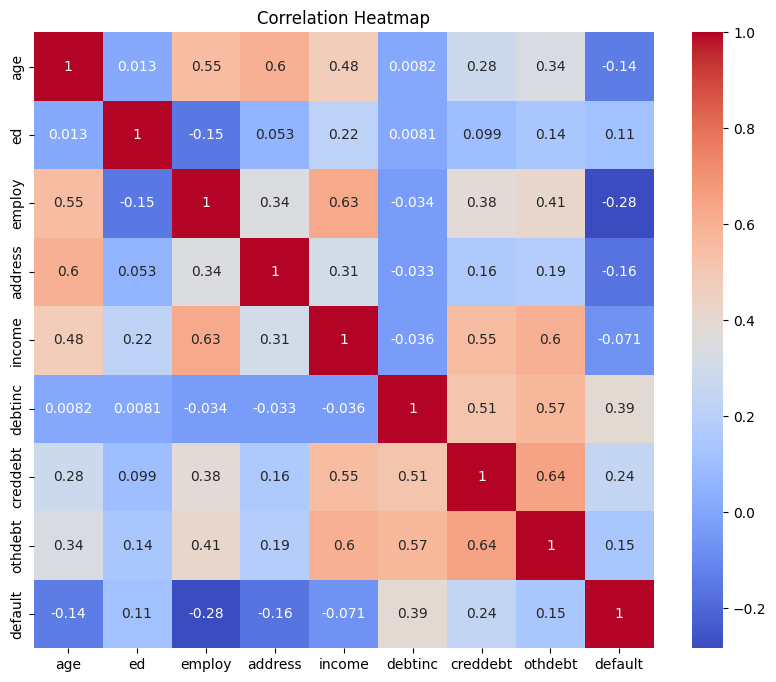

In [6]:
# Visualize the correlations between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Display the missing values in each column
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [8]:
# Drop the columns were default is null
df.dropna(subset=['default'], inplace=True)

In [14]:
# Feature engineering - debt to income ration > 0.4 is high else low
df['highdebtflag'] = np.where(df['debtinc'] > 30, 1, 0)
df['highdebtflag'].value_counts()

,count
highdebtflag,
0,690
1,10


In [15]:
# Separate features and target
X = df.drop(columns=['default'])
y = df["default"]
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predict default status for the test data
y_pred = rf.predict(X_test)
# Predicted probability
y_pred_prob = rf.predict_proba(X_test)[:, 1]

In [21]:
# Model evaluation results
print("Random Forest Report")
print(classification_report(y_test, y_pred))

Random Forest Report
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       103
         1.0       0.75      0.57      0.65        37

    accuracy                           0.84       140
   macro avg       0.80      0.75      0.77       140
weighted avg       0.83      0.84      0.83       140



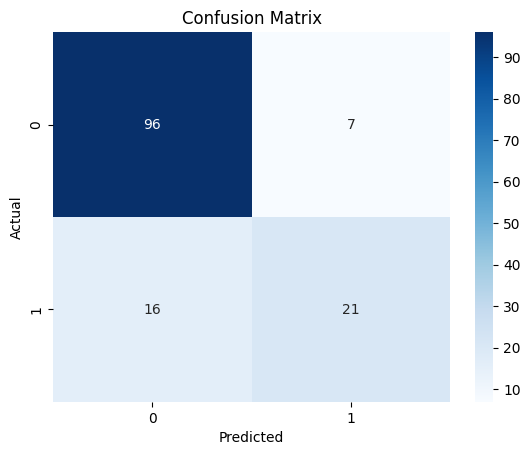

In [22]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

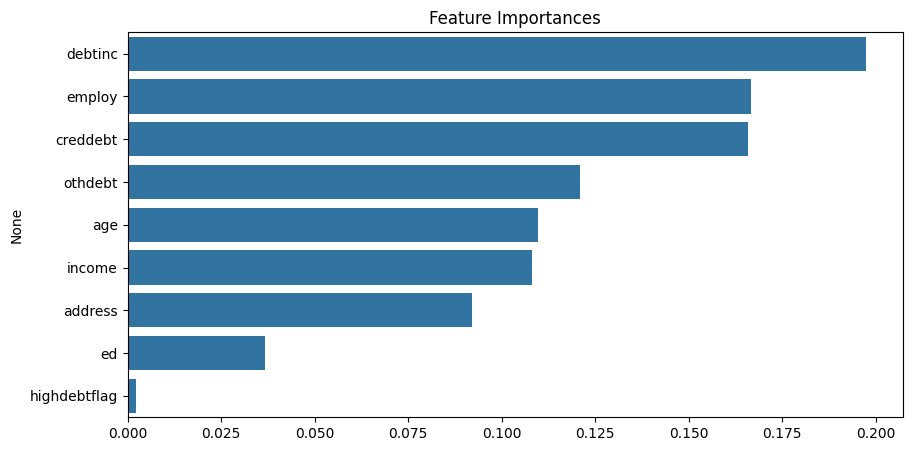

In [23]:
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances")
plt.show()

In [26]:
# Explainability with SHAP
explainer = shap.Explainer(rf, X_scaled)
shap_values = explainer(scaler.transform(X_test))

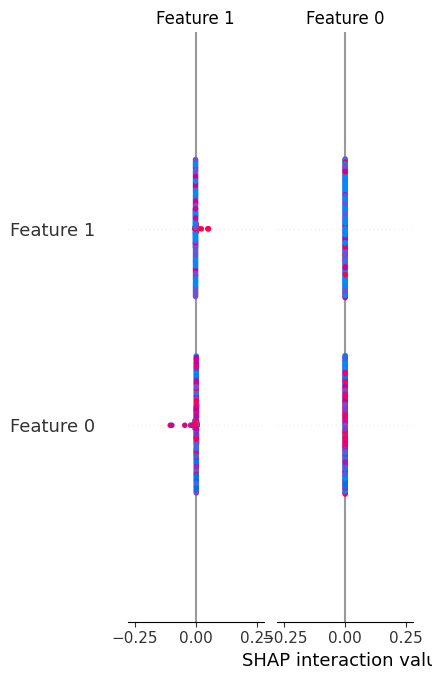

In [28]:
# SHAP summary plot
shap.summary_plot(shap_values, scaler.transform(X_test), plot_type="bar")

The end